# Import Dependancies
Requires: pandas, numpy, matplotlib, seaborn, statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Import Data using Pandas

File format is csv

In [2]:
raw_df = pd.read_csv("https://opendata.arcgis.com/datasets/70392a096a8e431381f1f692aaa06afd_24.csv")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(raw_df.dtypes)
raw_df.head()

X                             float64
Y                             float64
OBJECTID                        int64
CRIMEID                         int64
CCN                            object
REPORTDATE                     object
ROUTEID                        object
MEASURE                       float64
OFFSET                        float64
STREETSEGID                   float64
ROADWAYSEGID                  float64
FROMDATE                       object
TODATE                        float64
MARID                           int64
ADDRESS                        object
LATITUDE                      float64
LONGITUDE                     float64
XCOORD                        float64
YCOORD                        float64
WARD                           object
EVENTID                        object
MAR_ADDRESS                    object
MAR_SCORE                     float64
MAJORINJURIES_BICYCLIST         int64
MINORINJURIES_BICYCLIST         int64
UNKNOWNINJURIES_BICYCLIST       int64
FATAL_BICYCL

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-76.996122,38.881277,86659636,26815615,16004619,2016-01-09T16:06:28.000Z,13038612,513.893,0.000000,4929.0,...,13000702,7TH ST SE,5.264929,East,NaN,NaN,38.881270,-76.996120,NaN,NaN
1,-77.035987,38.902418,86659637,27339906,17101339,2017-06-15T01:21:20.000Z,21050891,432.098,2.320134,-9.0,...,11001602,16TH ST NW,48.395351,East,NaN,NaN,38.902431,-77.035985,396795.23,137153.77
2,-77.096054,38.916976,86659638,26815619,16004640,2016-01-09T16:20:28.000Z,11087232,2642.311,0.000000,1194.0,...,11057912,MACARTHUR BLVD NW,7.389798,Northeast,NaN,NaN,38.916947,-77.096039,391721.82,138770.05
3,-77.040570,38.926533,86659639,26815621,16004643,2016-01-09T16:24:08.000Z,11083592,17.374,0.000000,6748.0,...,11073192,QUARRY RD NW,24.587272,Southwest,NaN,NaN,38.926407,-77.040454,396492.15,139837.49
4,-77.037919,38.901721,86659640,25242761,15038378,2015-03-19T05:00:00.000Z,47088272,137.160,0.000000,-9.0,...,NaN,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_df.WARD = raw_df.WARD.astype('category')
raw_df.REPORTDATE = raw_df.REPORTDATE.astype('datetime64')

## Filter data for graphing by date

In [22]:
year_range = [2010, 2018]
filter_df = raw_df[list(map(lambda x: (x.year>=year_range[0]) & (x.year<=year_range[1]), raw_df.REPORTDATE))]

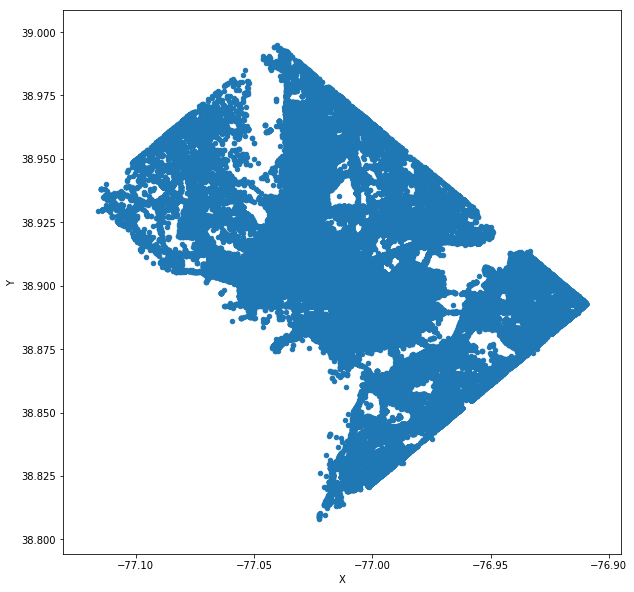

In [23]:
raw_df.plot(x='X', y='Y', kind='scatter', figsize=(10, 10));

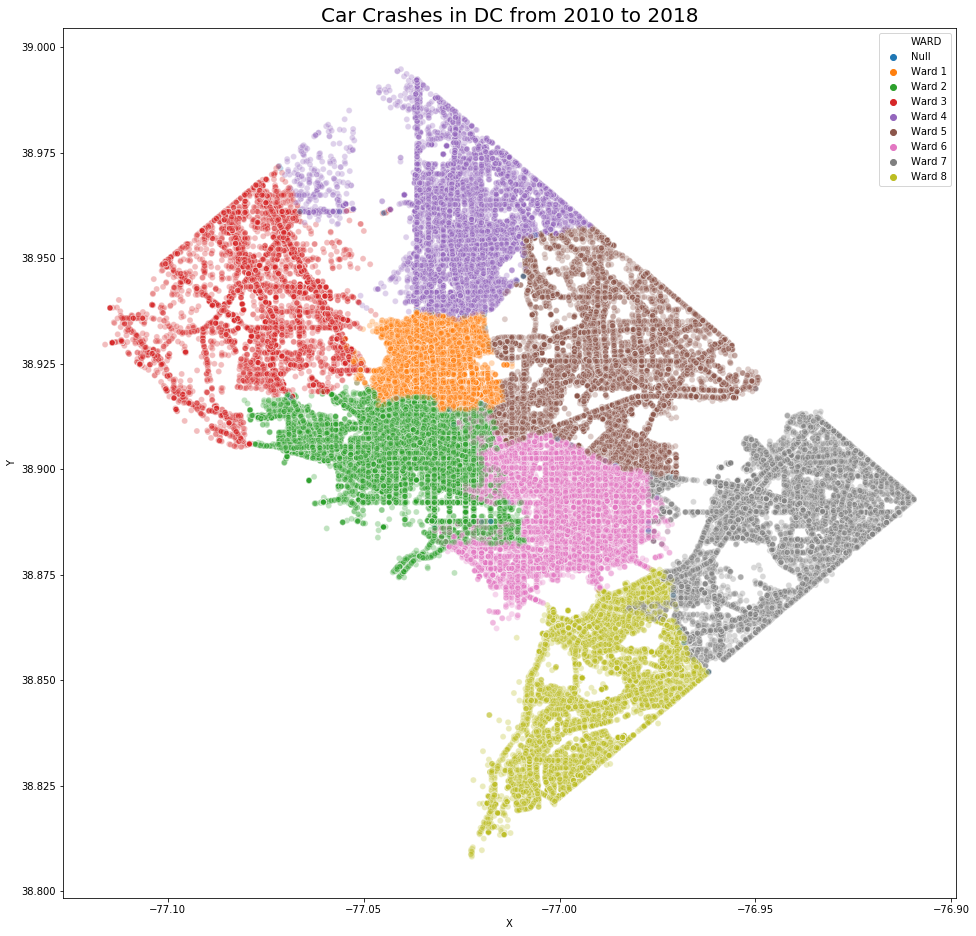

In [24]:
if year_range[0]==year_range[1]:
    chart_title = 'Car Crashes in DC during ' + str(year_range[0])
else:
    chart_title = 'Car Crashes in DC from {} to {}'.format(year_range[0], year_range[1])

fig = plt.figure(figsize=(16, 16))
sns.scatterplot(filter_df['X'], filter_df['Y'], hue=filter_df['WARD'], markers='.', alpha=0.3).set_title(chart_title, size=20);

#fig.savefig("crashes_by_ward.png")


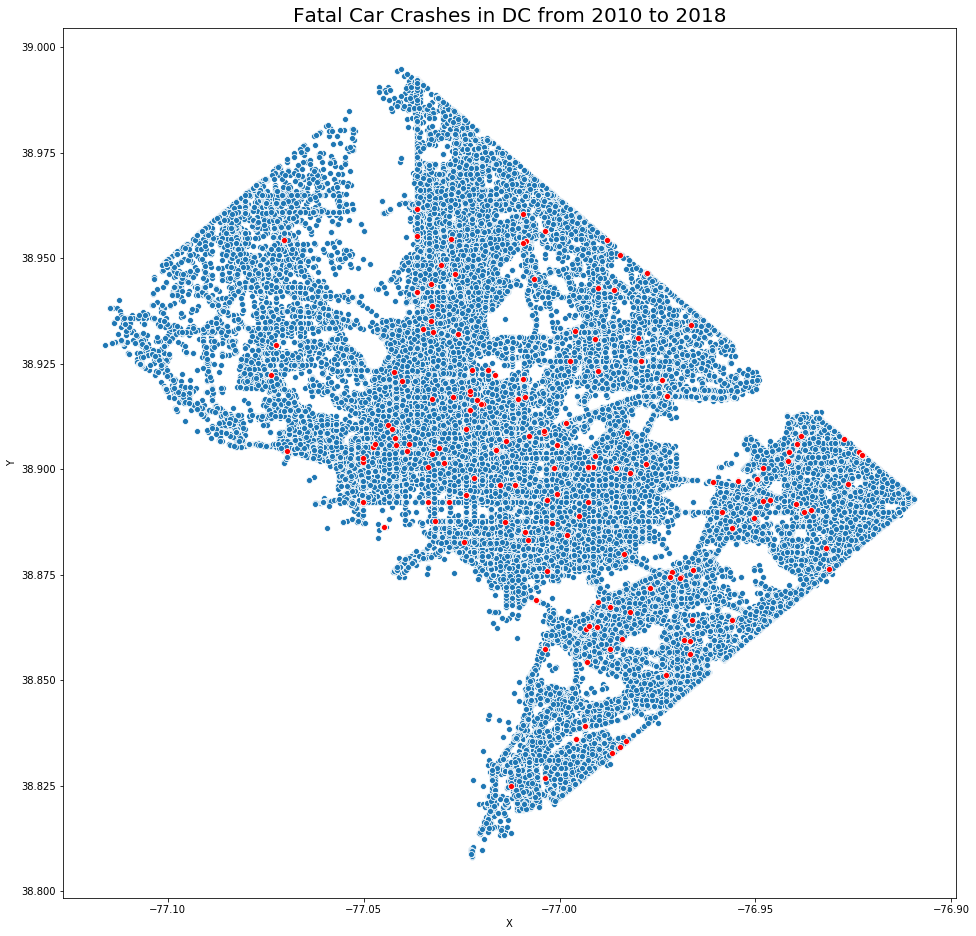

In [26]:
# fatal car crashes

fatal_crashes = filter_df[filter_df.FATAL_BICYCLIST + filter_df.FATAL_DRIVER + filter_df.FATAL_PEDESTRIAN > 0]

fatal_crashes

if year_range[0]==year_range[1]:
    chart_title = 'Fatal Car Crashes in DC during ' + str(year_range[0])
else:
    chart_title = 'Fatal Car Crashes in DC from {} to {}'.format(year_range[0], year_range[1])

fig = plt.figure(figsize=(16, 16))

sns.scatterplot(raw_df['X'], raw_df['Y'])


sns.scatterplot(fatal_crashes['X'], fatal_crashes['Y'], markers="X", color='red', legend='full').set_title(chart_title, size=20);

